In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

C:\Users\Pavilion\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('npl_train.csv').rename(columns = {'X':'id'})
pd.set_option('display.max_columns', None)
train.head()

,id,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19,0.0,74.78,100.00,0,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,0.0,0.00,0.00,0,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,0.0,100.00,100.91,0,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,G,100.00,0.0,25.01,22.64,0,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,0.0,97.49,99.84,0,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15493 entries, 0 to 15492
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   15493 non-null  int64  
 1   jumlah_kartu                         15493 non-null  int64  
 2   outstanding                          15493 non-null  int64  
 3   limit_kredit                         15493 non-null  float64
 4   tagihan                              15493 non-null  float64
 5   total_pemakaian_tunai                15493 non-null  float64
 6   total_pemakaian_retail               15493 non-null  float64
 7   sisa_tagihan_tidak_terbayar          15493 non-null  float64
 8   kode_cabang                          15393 non-null  object 
 9   rasio_pembayaran                     15493 non-null  float64
 10  persentasi_overlimit                 15493 non-null  float64
 11  rasio_pembayaran_3bulan     

In [4]:
train.describe()

,id,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
count,15493.000000,15493.000000,1.549300e+04,1.549300e+04,1.549300e+04,1.549300e+04,1.549300e+04,1.549300e+04,15493.00000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,1.549300e+04,1.549300e+04,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000
mean,7747.000000,2.506551,1.159833e+07,2.079833e+07,8.078663e+06,7.453291e+04,2.025857e+06,8.140875e+06,64.64712,3.343533,50.530351,81.666238,0.004776,0.087717,6.634093,2.100421e+06,2.968060e+06,0.468246,0.109362,0.167446,0.202609,0.571102,0.533719
std,4472.588196,1.012655,2.408569e+07,2.955334e+07,1.761286e+07,6.184139e+05,7.927677e+06,1.922430e+07,794.16940,9.241921,1327.275247,1467.822452,0.114088,0.282892,4.675454,8.092612e+06,6.262192e+06,0.473056,0.200159,0.192327,0.274293,0.411928,0.432350
min,1.000000,1.000000,0.000000e+00,3.000000e+06,2.004300e+04,0.000000e+00,-1.566720e+07,0.000000e+00,-18138.00000,0.000000,-57792.340000,-77056.000000,0.000000,0.000000,0.750000,-1.566720e+07,0.000000e+00,0.000000,-0.632000,-0.126000,-0.569000,0.000288,0.000000
25%,3874.000000,2.000000,2.000551e+06,5.000000e+06,8.182500e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000,20.200000,21.600000,0.000000,0.000000,2.920000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.035200,0.032900,0.189000,0.155000
50%,7747.000000,2.000000,4.726943e+06,9.000000e+06,3.145857e+06,0.000000e+00,2.010420e+05,2.750923e+06,27.00000,0.000000,50.000000,65.600000,0.000000,0.000000,5.666667,2.480000e+05,1.209318e+06,0.335000,0.022100,0.108000,0.117000,0.575000,0.496000
75%,11620.000000,3.000000,1.064848e+07,2.200000e+07,7.404991e+06,0.000000e+00,1.398000e+06,7.143198e+06,100.00000,1.060000,91.370000,100.000000,0.000000,0.000000,9.330000,1.512235e+06,3.088477e+06,0.930000,0.128000,0.239000,0.285000,0.917000,0.863000
max,15493.000000,16.000000,7.980586e+08,1.000000e+09,6.280000e+08,2.884057e+07,2.850000e+08,4.440000e+08,68983.00000,190.000000,75575.000000,54899.000000,5.000000,1.000000,34.416667,3.140000e+08,1.480000e+08,7.240000,4.600000,3.490000,8.110000,8.125671,9.730000


In [5]:
listItem = []

for col in train.columns:
    listItem.append([
        col, train[col].dtype, train[col].isna().sum(), 
                     round((train[col].isna().sum())/len(train[col])), 
                    train [col].nunique(), 
        list(train[col].drop_duplicates().sample(2).values)
    ])

dfDesc = pd.DataFrame(columns=['data features', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data=listItem)
dfDesc

,data features,dataType,null,nullPct,unique,uniqueSample
0,id,int64,0,0.0,15493,"[10978, 14099]"
1,jumlah_kartu,int64,0,0.0,15,"[12, 15]"
2,outstanding,int64,0,0.0,10359,"[4032678, 55068931]"
3,limit_kredit,float64,0,0.0,150,"[195000000.0, 97000000.0]"
4,tagihan,float64,0,0.0,10018,"[23095370.0, 4954199.0]"
5,total_pemakaian_tunai,float64,0,0.0,94,"[5700000.0, 5053700.0]"
6,total_pemakaian_retail,float64,0,0.0,5714,"[80536.0, 2507105.0]"
7,sisa_tagihan_tidak_terbayar,float64,0,0.0,6947,"[10078593.0, 12612635.0]"
8,kode_cabang,object,100,0.0,11,"[C, F]"
9,rasio_pembayaran,float64,0,0.0,1665,"[9.58, 99.78]"


In [6]:
train[train['jumlah_kartu'] == 16]

,id,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
1815,1816,16,80828619,89000000.0,76815260.0,0.0,-1113166.0,75524675.0,A,0.0,0.00,9.82,26.2,0,1,10.083333,-1113166.0,4720292.188,0.848592,-0.012507,0.000,0.080805,0.901,0.999798
13339,13340,16,99880887,150000000.0,2488844.0,0.0,44000000.0,6064580.0,A,0.0,0.18,97.10,88.6,0,0,27.700000,44000000.0,379036.000,0.040400,0.294000,0.349,0.565000,0.436,0.444000


In [7]:
train['flag_kredit_macet'].value_counts()

0    14134
1     1359
Name: flag_kredit_macet, dtype: int64

In [8]:
train['flag_kredit_macet'].value_counts(normalize = True)

0    0.912283
1    0.087717
Name: flag_kredit_macet, dtype: float64

In [9]:
def detect_outliers(df,n,features):
    outlier_id = []
    features_upper_outlier = []
    features_bottom_outlier = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
    
        outlier_step = 1.5 * IQR
        features_upper_outlier.append(Q3 + outlier_step)
        features_bottom_outlier.append(Q1 - outlier_step)
    
        outlier_list_col = df[(df[col] < Q1 - outlier_step) |(df[col] > Q3 + outlier_step)]['id']
        outlier_id.extend(outlier_list_col)
    
    outlier_id_counter = Counter(outlier_id)
    multiple_outliers = list(k for k, v in outlier_id_counter.items() if v > n)
    
    return multiple_outliers
    

In [10]:
features_basic_numerical = train.drop(['id', 'flag_kredit_macet', 'skor_delikuensi'], axis = 1).select_dtypes('number').columns
outlier_to_drop = detect_outliers(train, 3, features_basic_numerical)

In [11]:
len(outlier_to_drop)

2329

In [12]:
id_to_drop = train[(train['id'].isin(outlier_to_drop)) & (train['flag_kredit_macet'] == 0)]['id'].tolist()

In [13]:
len(id_to_drop)

2034

In [14]:
train = train[~train['id'].isin(id_to_drop)]

In [15]:
train['flag_kredit_macet'].value_counts()

0    12100
1     1359
Name: flag_kredit_macet, dtype: int64

In [16]:
train['flag_kredit_macet'].value_counts(normalize = True)

0    0.899027
1    0.100973
Name: flag_kredit_macet, dtype: float64

In [17]:
train[train['kode_cabang'].isna()]['flag_kredit_macet'].value_counts()

0    77
1     5
Name: flag_kredit_macet, dtype: int64

In [18]:
train['kode_cabang'].value_counts()

A    7359
F    1502
B    1214
I     887
E     531
G     524
J     384
H     335
C     304
D     182
K     155
Name: kode_cabang, dtype: int64

In [19]:
kode = []
value = []

for k in train['kode_cabang'].unique():
    totalKM = sum(train[train['kode_cabang'] == k]['flag_kredit_macet'])
    meanK = 0
    if(totalKM > 0):
        meanK = (sum(train[train['kode_cabang'] == k]['flag_kredit_macet'])/ len(train[train['kode_cabang'] == k]))*100
        kode.append(k)
        value.append(meanK)
        
serCabang = pd.Series(value, index = kode)
serCabang.sort_values(ascending = False)

I    11.499436
K    10.967742
B    10.873147
E    10.734463
A    10.422612
H     9.850746
F     9.587217
C     8.881579
J     8.593750
D     6.593407
G     5.725191
dtype: float64

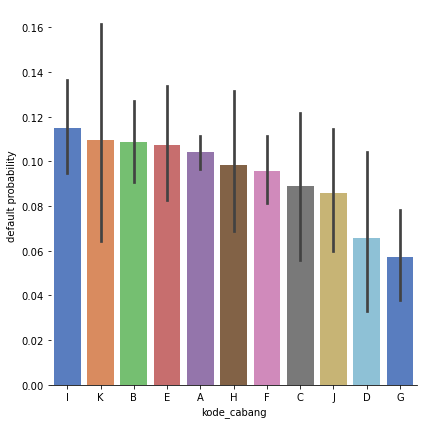

In [20]:
g = sns.catplot(x = 'kode_cabang', y = 'flag_kredit_macet', data = train, height = 6, kind = 'bar', palette = 'muted', 
                  estimator = np.mean, order = train.groupby('kode_cabang').mean()['flag_kredit_macet'].sort_values(ascending = False).index)
g.despine(left = True)
g = g.set_ylabels('default probability')

In [21]:
train.fillna('I', inplace = True)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13459 entries, 0 to 15492
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   13459 non-null  int64  
 1   jumlah_kartu                         13459 non-null  int64  
 2   outstanding                          13459 non-null  int64  
 3   limit_kredit                         13459 non-null  float64
 4   tagihan                              13459 non-null  float64
 5   total_pemakaian_tunai                13459 non-null  float64
 6   total_pemakaian_retail               13459 non-null  float64
 7   sisa_tagihan_tidak_terbayar          13459 non-null  float64
 8   kode_cabang                          13459 non-null  object 
 9   rasio_pembayaran                     13459 non-null  float64
 10  persentasi_overlimit                 13459 non-null  float64
 11  rasio_pembayaran_3bulan     

## Feature Engineering

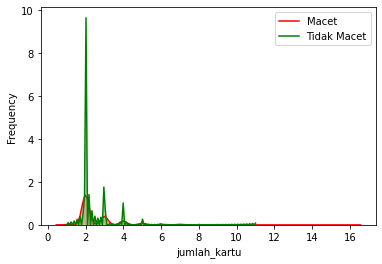

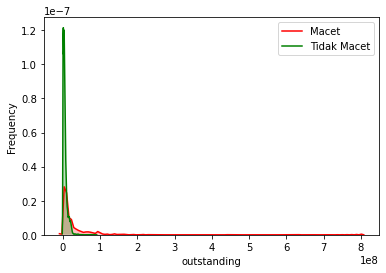

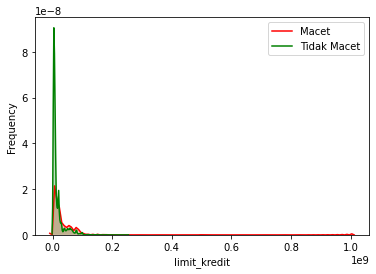

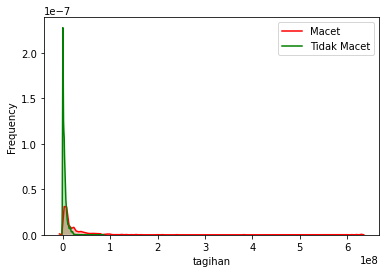

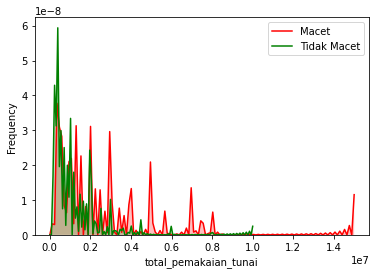

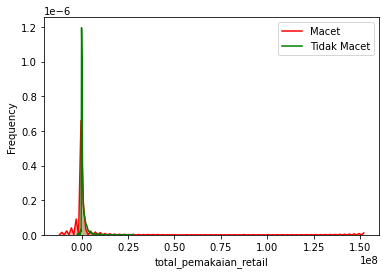

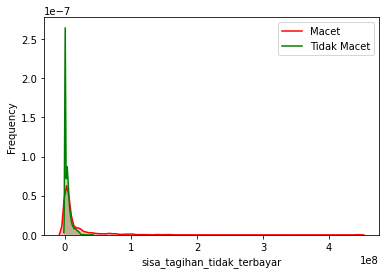

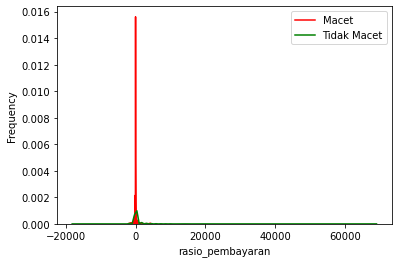

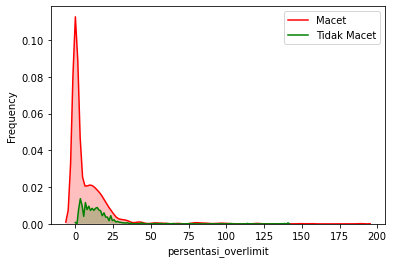

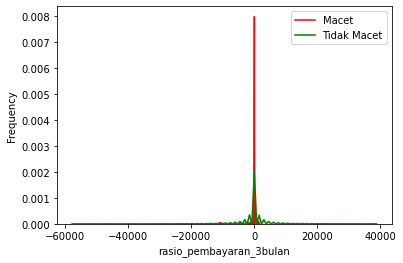

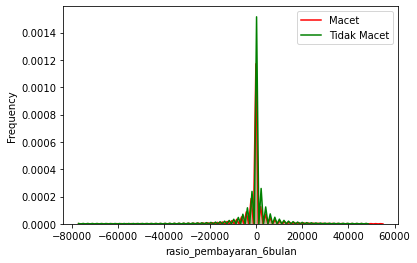

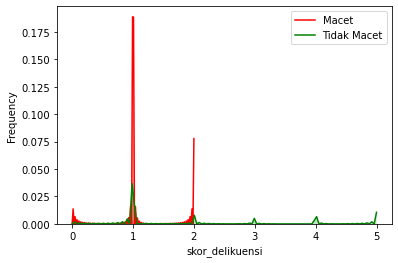

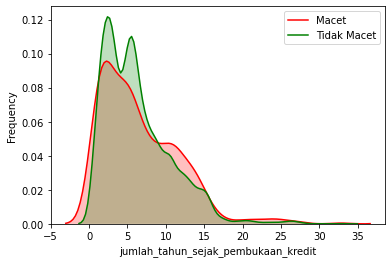

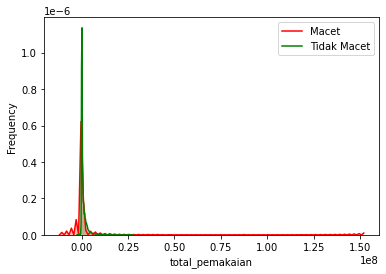

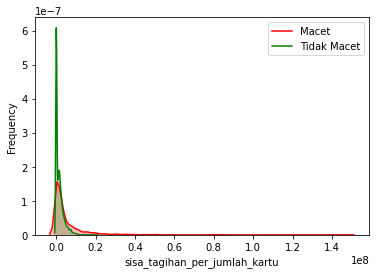

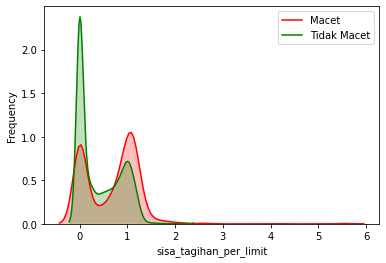

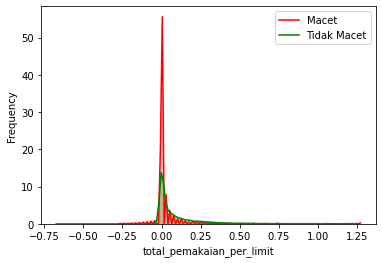

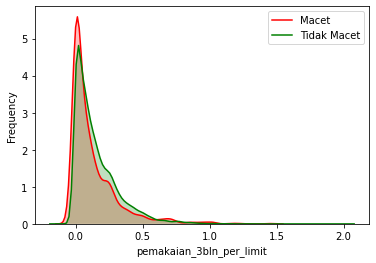

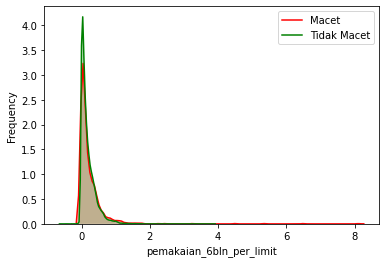

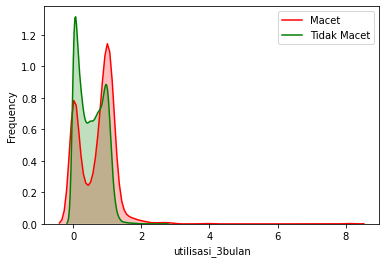

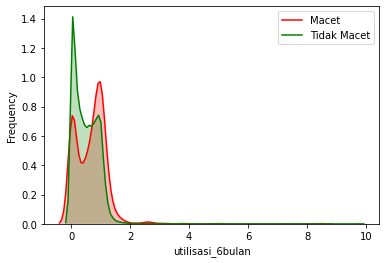

In [23]:
for col in train.drop(['id', 'flag_kredit_macet'], axis = 1).select_dtypes('number').columns:
    g = sns.kdeplot(train[(train['flag_kredit_macet'] ==1)][col], color = 'red', shade = True)
    g = sns.kdeplot(train[(train['flag_kredit_macet'] ==0)][col], color = 'green', shade = True)
    plt.legend(['Macet', 'Tidak Macet'])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [24]:
train[(train['tagihan'] > train['tagihan'].mean() + (3* train['tagihan'].std()))]['flag_kredit_macet'].value_counts()

1    134
0     11
Name: flag_kredit_macet, dtype: int64

In [25]:
train[(train['total_pemakaian_tunai'] > train['total_pemakaian_tunai'].mean() + (3* train['total_pemakaian_tunai'].std()))]['flag_kredit_macet'].value_counts()

0    133
1     35
Name: flag_kredit_macet, dtype: int64

In [26]:
train['rasio_pembayaran'] = train['rasio_pembayaran'].apply(lambda ras: 0 if ras < 0 else ras)
train['rasio_pembayaran_3bulan'] = train['rasio_pembayaran_3bulan'].apply(lambda ras: 0 if ras < 0 else ras)
train['rasio_pembayaran_6bulan'] = train['rasio_pembayaran_6bulan'].apply(lambda ras: 0 if ras < 0 else ras)

In [27]:
train.describe()

,id,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
count,13459.000000,13459.000000,1.345900e+04,1.345900e+04,1.345900e+04,1.345900e+04,1.345900e+04,1.345900e+04,13459.000000,13459.000000,13459.000000,13459.000000,13459.000000,13459.000000,13459.000000,1.345900e+04,1.345900e+04,13459.000000,13459.000000,13459.000000,13459.000000,13459.000000,13459.000000
mean,7720.642098,2.376402,6.859532e+06,1.600479e+07,4.875820e+06,4.459329e+04,8.984658e+05,4.822436e+06,60.379597,2.934699,69.934091,91.196396,0.005498,0.100973,6.293546,9.430591e+05,1.931639e+06,0.442446,0.086310,0.148454,0.184162,0.539295,0.509423
std,4475.033870,0.795904,1.528072e+07,2.395373e+07,1.136996e+07,3.537127e+05,2.561418e+06,1.242972e+07,629.464282,8.385325,481.980667,863.396062,0.122390,0.301305,4.429554,2.585494e+06,4.103413e+06,0.463139,0.157144,0.163793,0.248340,0.402185,0.417610
min,1.000000,1.000000,0.000000e+00,3.000000e+06,2.004300e+04,0.000000e+00,-1.200000e+07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,-1.200000e+07,0.000000e+00,0.000000,-0.632000,-0.126000,-0.569000,0.000288,0.000000
25%,3839.500000,2.000000,1.571995e+06,5.000000e+06,6.569765e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,20.400000,21.400000,0.000000,0.000000,2.830000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.027800,0.026300,0.154000,0.130000
50%,7705.000000,2.000000,3.850823e+06,8.000000e+06,2.612858e+06,0.000000e+00,1.095000e+05,2.255200e+06,26.600000,0.000000,50.000000,64.200000,0.000000,0.000000,5.420000,1.490000e+05,9.797560e+05,0.262090,0.013900,0.096300,0.106796,0.524000,0.464000
75%,11611.500000,3.000000,7.499576e+06,1.900000e+07,5.537610e+06,0.000000e+00,9.029000e+05,5.586080e+06,100.000000,0.000000,88.650000,100.000000,0.000000,0.000000,8.670000,1.000000e+06,2.480130e+06,0.900000,0.102000,0.218750,0.264500,0.894000,0.842000
max,15493.000000,16.000000,7.980586e+08,1.000000e+09,6.280000e+08,1.500000e+07,1.520000e+08,4.440000e+08,68983.000000,189.000000,38828.000000,54899.000000,5.000000,1.000000,32.900000,1.520000e+08,1.480000e+08,5.530000,1.270000,2.010000,8.110000,8.125671,9.730000


In [28]:
for col in ['rasio_pembayaran', 'rasio_pembayaran_3bulan', 'rasio_pembayaran_6bulan']:
    batas_max = (np.percentile(train[col], 75)) + (1.5 * (np.percentile(train[col], 75)- np.percentile(train[col], 25)))
    train[col] = train[col].apply(lambda x: batas_max if x > batas_max else x)

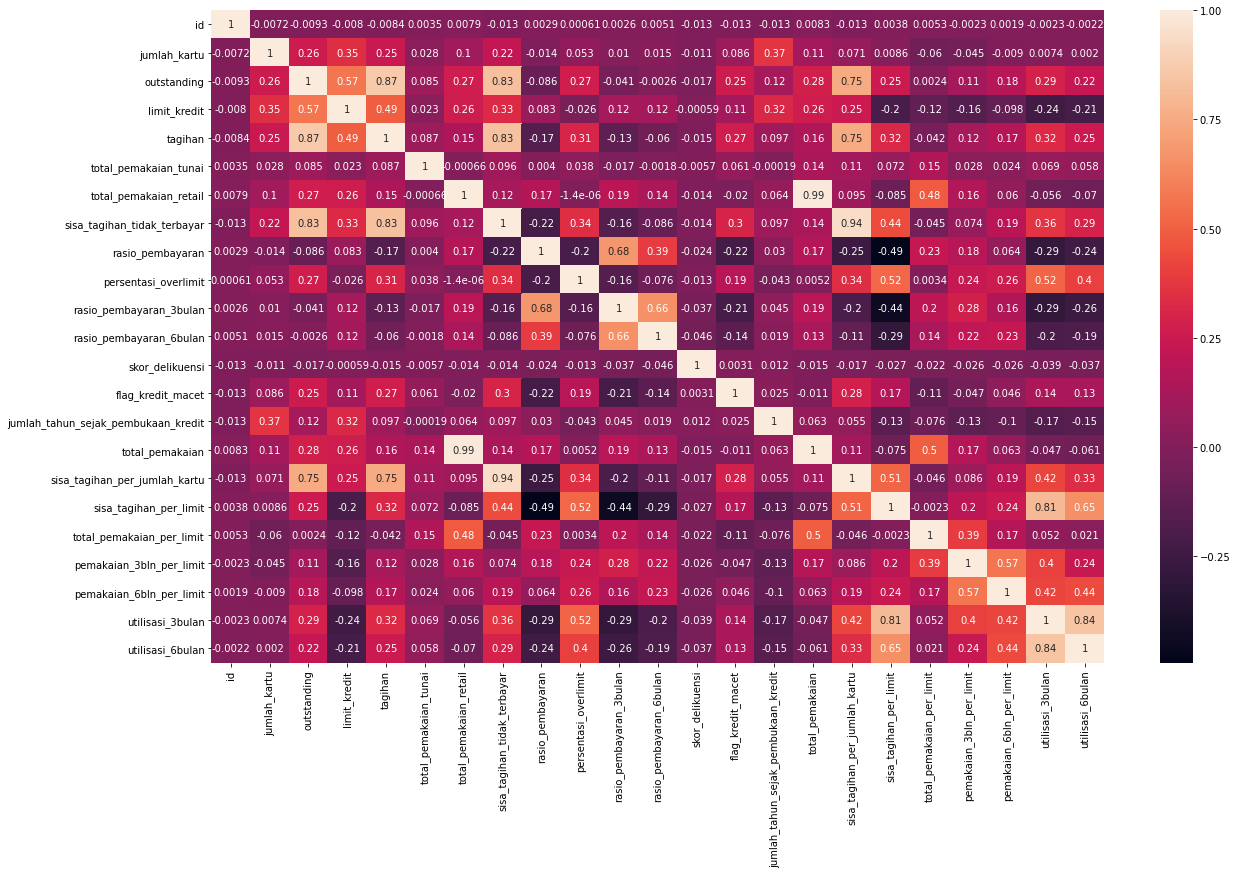

In [29]:
plt.figure(figsize = (20,12))
sns.heatmap(train.corr(), annot = True)

In [30]:
train.describe()

,id,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
count,13459.000000,13459.000000,1.345900e+04,1.345900e+04,1.345900e+04,1.345900e+04,1.345900e+04,1.345900e+04,13459.000000,13459.000000,13459.000000,13459.000000,13459.000000,13459.000000,13459.000000,1.345900e+04,1.345900e+04,13459.000000,13459.000000,13459.000000,13459.000000,13459.000000,13459.000000
mean,7720.642098,2.376402,6.859532e+06,1.600479e+07,4.875820e+06,4.459329e+04,8.984658e+05,4.822436e+06,49.212973,2.934699,55.044938,62.362132,0.005498,0.100973,6.293546,9.430591e+05,1.931639e+06,0.442446,0.086310,0.148454,0.184162,0.539295,0.509423
std,4475.033870,0.795904,1.528072e+07,2.395373e+07,1.136996e+07,3.537127e+05,2.561418e+06,1.242972e+07,49.823819,8.385325,38.795547,43.677291,0.122390,0.301305,4.429554,2.585494e+06,4.103413e+06,0.463139,0.157144,0.163793,0.248340,0.402185,0.417610
min,1.000000,1.000000,0.000000e+00,3.000000e+06,2.004300e+04,0.000000e+00,-1.200000e+07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,-1.200000e+07,0.000000e+00,0.000000,-0.632000,-0.126000,-0.569000,0.000288,0.000000
25%,3839.500000,2.000000,1.571995e+06,5.000000e+06,6.569765e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,20.400000,21.400000,0.000000,0.000000,2.830000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.027800,0.026300,0.154000,0.130000
50%,7705.000000,2.000000,3.850823e+06,8.000000e+06,2.612858e+06,0.000000e+00,1.095000e+05,2.255200e+06,26.600000,0.000000,50.000000,64.200000,0.000000,0.000000,5.420000,1.490000e+05,9.797560e+05,0.262090,0.013900,0.096300,0.106796,0.524000,0.464000
75%,11611.500000,3.000000,7.499576e+06,1.900000e+07,5.537610e+06,0.000000e+00,9.029000e+05,5.586080e+06,100.000000,0.000000,88.650000,100.000000,0.000000,0.000000,8.670000,1.000000e+06,2.480130e+06,0.900000,0.102000,0.218750,0.264500,0.894000,0.842000
max,15493.000000,16.000000,7.980586e+08,1.000000e+09,6.280000e+08,1.500000e+07,1.520000e+08,4.440000e+08,250.000000,189.000000,191.025000,217.900000,5.000000,1.000000,32.900000,1.520000e+08,1.480000e+08,5.530000,1.270000,2.010000,8.110000,8.125671,9.730000


In [31]:
train = pd.get_dummies(train, drop_first = True, columns = ['skor_delikuensi', 'kode_cabang'])

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13459 entries, 0 to 15492
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   13459 non-null  int64  
 1   jumlah_kartu                         13459 non-null  int64  
 2   outstanding                          13459 non-null  int64  
 3   limit_kredit                         13459 non-null  float64
 4   tagihan                              13459 non-null  float64
 5   total_pemakaian_tunai                13459 non-null  float64
 6   total_pemakaian_retail               13459 non-null  float64
 7   sisa_tagihan_tidak_terbayar          13459 non-null  float64
 8   rasio_pembayaran                     13459 non-null  float64
 9   persentasi_overlimit                 13459 non-null  float64
 10  rasio_pembayaran_3bulan              13459 non-null  float64
 11  rasio_pembayaran_6bulan     

In [33]:
def feature_engineering_jumlah_kartu(df):
    df['Jumlah_kartu_total_sisa_tagihan_semua_kartu'] = df.apply(lambda x: x['jumlah_kartu'] * x[
        'sisa_tagihan_per_jumlah_kartu'], axis =1)
    return df

def feature_engineering_limit_kredit(df):
    df['limit_kredit_per_jumlah_kartu'] = df.apply(lambda x: x['limit_kredit']/ x['jumlah_kartu'], axis = 1)
    df['limit_kredit_overlimit_maksimum'] = df.apply(lambda x: x['limit_kredit'] + (x['limit_kredit'] * x[
                                                                'persentasi_overlimit']), axis =1)
    df['limit_kredit_total_sisa_tagihan_semua_limit'] = df.apply(lambda x: x['limit_kredit'] * x['sisa_tagihan_per_limit'], 
                                                                 axis =1)
    return df

def feature_engineering_jumlah_tahun_sejak_pembukaan_kredit(df):
    df['jumlah_tahun_sejak_pembukaan_kredit_average_quarter_utilization'] = df.apply(lambda x: x[
        'jumlah_tahun_sejak_pembukaan_kredit'] * 4 * x['utilisasi_3bulan'], axis =1)
    df['jumlah_tahun_sejak_pembukaan_kredit_average_semester_utilization'] = df.apply(lambda x: x[
        'jumlah_tahun_sejak_pembukaan_kredit'] * 2 * x['utilisasi_6bulan'], axis =1)
    df['jumlah_tahun_sejak_pembukaan_kredit_average_quarter_utilization_per_limit'] = df.apply(lambda x: x[
        'jumlah_tahun_sejak_pembukaan_kredit'] * 4 * x['pemakaian_3bln_per_limit'], axis =1)
    df['jumlah_tahun_sejak_pembukaan_kredit_average_semester_utilization_per_limit'] = df.apply(lambda x: x[
        'jumlah_tahun_sejak_pembukaan_kredit'] * 2 * x['pemakaian_6bln_per_limit'], axis =1)
    df['jumlah_tahun_sejak_pembukaan_kredit_rata_rata_waktu_pembukaan_kredit'] = df.apply(lambda x: x[
        'jumlah_tahun_sejak_pembukaan_kredit']/ x['jumlah_kartu'], axis = 1)
    return df

def feature_engineering_persentasi_overlimit(df):
    df['persentasi_overlimit_excess'] = df.apply(lambda x: x['persentasi_overlimit'] * x['limit_kredit'], axis = 1)
    return df

def feature_engineering_total_pemakaian(df):
    df['total_pemakaian_tunai_retail'] = df.apply(lambda x: x['total_pemakaian_tunai'] + x['total_pemakaian_retail'], axis =1)
    df['total_pemakaian_per_limit_kredit'] = df.apply(lambda x: x['total_pemakaian'] / x['limit_kredit'], axis =1)
    df['total_pemakaian_per_jumlah_kartu']= df.apply(lambda x: x['total_pemakaian']/ x['jumlah_kartu'], axis =1)
    df['total_pemakaian_unexpected'] = df.apply(lambda x: 1 if x['total_pemakaian'] <= 0.00 and 
                                                x['total_pemakaian_tunai'] <= 0.00 and
                                                x['total_pemakaian_retail'] <= 0.00 else 0, axis =1)
    return df

def feature_engineering_tagihan(df):
    df['tagihan_terbayar'] = df.apply(lambda x: x['tagihan'] - x['sisa_tagihan_tidak_terbayar'], axis =1)
    df['tagihan_per_limit_kredit'] = df.apply(lambda x: x['tagihan']/ x['limit_kredit'], axis =1)
    df['sisa_tagihan_tidak_terbayar_percentage'] = df.apply(lambda x: x['sisa_tagihan_tidak_terbayar']/x['tagihan'], axis =1)
    return df

def feature_engineering_sisa_tagihan(df):
    df['tagihan_per_jumlah_kartu'] = df.apply(lambda x: x['tagihan']/ x['jumlah_kartu'], axis =1)
    return df

def feature_engineering_utilisasi_3bulan(df):
    df['utilisasi_3bln_per_jumlah_kartu'] = df.apply(lambda x: x['utilisasi_3bulan']/ x['jumlah_kartu'], axis = 1)
    return df

def feature_engineering_utilisasi_6bulan(df):
    df['utilisasi_6bln_per_jumlah_kartu'] = df.apply(lambda x: x['utilisasi_6bulan']/ x['jumlah_kartu'], axis = 1)
    return df

In [34]:
train = feature_engineering_jumlah_kartu(train)
train = feature_engineering_limit_kredit(train)
train = feature_engineering_jumlah_tahun_sejak_pembukaan_kredit(train)
train = feature_engineering_persentasi_overlimit(train)
train = feature_engineering_total_pemakaian(train)
train = feature_engineering_tagihan(train)
train = feature_engineering_sisa_tagihan(train)
train = feature_engineering_utilisasi_3bulan(train)
train = feature_engineering_utilisasi_6bulan(train)

In [35]:
train.head()

,id,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,skor_delikuensi_1,skor_delikuensi_2,skor_delikuensi_3,skor_delikuensi_4,skor_delikuensi_5,kode_cabang_B,kode_cabang_C,kode_cabang_D,kode_cabang_E,kode_cabang_F,kode_cabang_G,kode_cabang_H,kode_cabang_I,kode_cabang_J,kode_cabang_K,Jumlah_kartu_total_sisa_tagihan_semua_kartu,limit_kredit_per_jumlah_kartu,limit_kredit_overlimit_maksimum,limit_kredit_total_sisa_tagihan_semua_limit,jumlah_tahun_sejak_pembukaan_kredit_average_quarter_utilization,jumlah_tahun_sejak_pembukaan_kredit_average_semester_utilization,jumlah_tahun_sejak_pembukaan_kredit_average_quarter_utilization_per_limit,jumlah_tahun_sejak_pembukaan_kredit_average_semester_utilization_per_limit,jumlah_tahun_sejak_pembukaan_kredit_rata_rata_waktu_pembukaan_kredit,persentasi_overlimit_excess,total_pemakaian_tunai_retail,total_pemakaian_per_limit_kredit,total_pemakaian_per_jumlah_kartu,total_pemakaian_unexpected,tagihan_terbayar,tagihan_per_limit_kredit,sisa_tagihan_tidak_terbayar_percentage,tagihan_per_jumlah_kartu,utilisasi_3bln_per_jumlah_kartu,utilisasi_6bln_per_jumlah_kartu
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,102.19,0.0,74.78,100.00,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,26323.0,3.500000e+06,7000000.0,26323.003,0.815729,0.676771,0.722656,0.549127,7.708333,0.0,94.0,0.000013,47.0,0,-2886.0,0.003348,1.123139,11718.50,0.006614,0.010975
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,0.00,0.0,0.00,0.00,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,5.000000e+06,10000000.0,0.000,0.012695,0.000450,0.000000,0.000000,0.375000,0.0,1012.0,0.000101,506.0,0,254564.0,0.025456,0.000000,127282.00,0.002116,0.000150
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,100.00,0.0,100.00,100.91,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,9.333333e+06,28000000.0,0.000,10.723739,5.758835,1.742268,1.025619,3.583333,0.0,0.0,0.000000,0.0,1,4159779.0,0.148564,0.000000,1386593.00,0.083130,0.089284
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,100.00,0.0,25.01,22.64,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,581334.0,5.250000e+06,21000000.0,581333.991,8.051056,13.692067,4.421677,0.665606,4.937500,0.0,2536660.0,0.120793,634165.0,0,-470103.0,0.005297,5.226367,27807.75,0.025478,0.086659
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,95.99,0.0,97.49,99.84,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5951865.0,5.000000e+06,10000000.0,5951865.000,4.719100,1.121905,2.153513,0.437208,0.833333,0.0,2666558.0,0.266656,1333279.0,0,147418.0,0.609928,0.975830,3049641.50,0.353933,0.168286


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13459 entries, 0 to 15492
Data columns (total 57 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   id                                                                          13459 non-null  int64  
 1   jumlah_kartu                                                                13459 non-null  int64  
 2   outstanding                                                                 13459 non-null  int64  
 3   limit_kredit                                                                13459 non-null  float64
 4   tagihan                                                                     13459 non-null  float64
 5   total_pemakaian_tunai                                                       13459 non-null  float64
 6   total_pemakaian_retail                        

In [37]:
data = train.drop(['id', 'flag_kredit_macet'], axis = 1)
target = train['flag_kredit_macet']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.30, random_state = 101)

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score

In [40]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 101)

In [41]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [42]:
predict = rfc.predict(X_test)
predictProb = rfc.predict_proba(X_test)

In [43]:
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))
print('ROC_AUC_Score: {}'.format(roc_auc_score(y_test, predictProb[:, 1])))

[[3608   45]
 [ 273  112]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3653
           1       0.71      0.29      0.41       385

    accuracy                           0.92      4038
   macro avg       0.82      0.64      0.69      4038
weighted avg       0.91      0.92      0.91      4038

ROC_AUC_Score: 0.8678968718114626


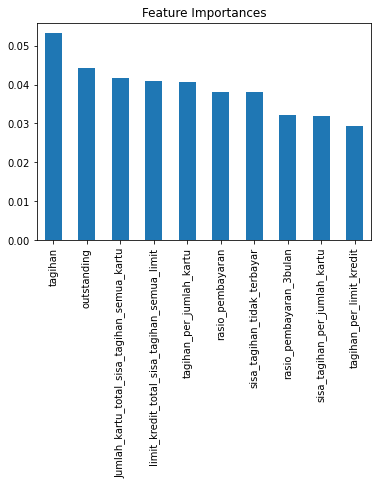

In [44]:
coef1 = pd.Series(rfc.feature_importances_, X_train.columns).sort_values(ascending = False).head(10)
coef1.plot(kind = 'bar', title = 'Feature Importances')

## Grid Search

In [45]:
from sklearn.model_selection import GridSearchCV

param = {'class_weight': ({0:1, 1:2}, {0:1, 1:3}, {0:1, 1:10}), 'min_samples_leaf': (5, 10, 15)}
rfc = RandomForestClassifier(n_estimators = 100, random_state  = 101)
dt = GridSearchCV(rfc, param, scoring = ['roc_auc', 'recall'], refit='recall', cv = 5)
dt.fit(X_train, y_train)
dt.best_estimator_

RandomForestClassifier(class_weight={0: 1, 1: 10}, min_samples_leaf=15,
                       random_state=101)

In [46]:
rfc = RandomForestClassifier(n_estimators = 100, class_weight = {0:1, 1:10}, min_samples_leaf = 15, random_state = 101)
rfc.fit(X_train, y_train)
predict = rfc.predict(X_test)
predictProb = rfc.predict_proba(X_test)

In [47]:
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))
print('ROC_AUC_Score: {}'.format(roc_auc_score(y_test, predictProb[:, 1])))

[[3130  523]
 [ 118  267]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3653
           1       0.34      0.69      0.45       385

    accuracy                           0.84      4038
   macro avg       0.65      0.78      0.68      4038
weighted avg       0.90      0.84      0.86      4038

ROC_AUC_Score: 0.8711750882569388


In [48]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [49]:
y_train.value_counts()

0    8447
1     974
Name: flag_kredit_macet, dtype: int64

In [50]:
#SMOTE
smot = SMOTE(random_state = 101)
X_smot, y_smot = smot.fit_sample(X_train, y_train)

#Random OverSampler
# ros = RandomOverSampler()
# X_ros, y_ros = ros.fit_sample(X_train, y_train)


In [51]:
pd.Series(y_smot).value_counts()

1    8447
0    8447
Name: flag_kredit_macet, dtype: int64

In [52]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 101, min_samples_split = 25)

In [53]:
rfc.fit(X_smot, y_smot)

RandomForestClassifier(min_samples_split=25, random_state=101)

In [54]:
prediction = rfc.predict(X_test)
predict_prob = rfc.predict_proba(X_test)

In [55]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))
print('ROC_AUC_Score: {}'.format(roc_auc_score(y_test, predict_prob[:, 1])))

[[3286  367]
 [ 174  211]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3653
           1       0.37      0.55      0.44       385

    accuracy                           0.87      4038
   macro avg       0.66      0.72      0.68      4038
weighted avg       0.89      0.87      0.88      4038

ROC_AUC_Score: 0.8570994841457474
